In [1]:
import pandas as pd

In [20]:
import numpy as np

In [2]:
dataSet = pd.read_csv('udemysheet.csv')
dataSet

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Subject: Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1227578.0,Learning Path: The Road to Elasticsearch,https://www.udemy.com/learning-path-the-road-t...,200.0,50.0,5.0,60.0,Beginner Level,0.96,5.0,2017-05-29T17:56:24Z,Subject: Web Development
1201,1277924.0,Angular 4 Front To Back,https://www.udemy.com/angular-4-front-to-back/,40.0,44.0,0.0,68.0,All Levels,0.15,8.5,2017-07-06T15:04:55Z,Subject: Web Development
1202,1248172.0,Essentials of Spring 5.0 for Developers,https://www.udemy.com/essentials-of-spring-50-...,125.0,34.0,2.0,21.0,Beginner Level,0.46,1.5,2017-06-11T18:34:40Z,Subject: Web Development
1203,1250934.0,Display and analyze GIS data on the web with L...,https://www.udemy.com/display-and-analyze-gis-...,100.0,25.0,4.0,66.0,Beginner Level,0.67,12.5,2017-06-15T21:17:43Z,Subject: Web Development


In [3]:
dataSet = pd.read_csv('udemysheet.csv')
del dataSet["course_title"]
del dataSet["level"]
del dataSet["published_timestamp"]
del dataSet["subject"]
del dataSet["url"]
dataSet.info()
dataSet.notnull()
dataSet.head(1205)
dataSet.isnull().sum()
dataSet.isnull().all()
dataSet.fillna(0,inplace = True)
dataSet.isnull().sum()
dataSet = dataSet.drop_duplicates()
df = dataSet.duplicated()
dataSet[df]
dataSet
# df = dataSet.drop('course_title',inplace=True)
# df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1203 non-null   float64
 1   price             1203 non-null   float64
 2   num_subscribers   1203 non-null   float64
 3   num_reviews       1203 non-null   float64
 4   num_lectures      1203 non-null   float64
 5   Rating            1203 non-null   float64
 6   content_duration  1203 non-null   float64
dtypes: float64(7)
memory usage: 66.0 KB


,course_id,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration
0,41295.0,0.0,268923.0,8629.0,45.0,0.82,10.5
1,59014.0,0.0,161029.0,279.0,27.0,0.69,3.5
2,625204.0,200.0,121584.0,27445.0,342.0,0.89,43.0
3,173548.0,0.0,120291.0,5924.0,30.0,0.78,3.0
4,764164.0,200.0,114512.0,22412.0,304.0,0.55,30.5
...,...,...,...,...,...,...,...
1200,1227578.0,200.0,50.0,5.0,60.0,0.96,5.0
1201,1277924.0,40.0,44.0,0.0,68.0,0.15,8.5
1202,1248172.0,125.0,34.0,2.0,21.0,0.46,1.5
1203,1250934.0,100.0,25.0,4.0,66.0,0.67,12.5


In [4]:
from sklearn.model_selection import train_test_split
X = dataSet.drop(columns = 'Rating',axis = 1)
Y = dataSet["Rating"]
print(X)
print(Y)

      course_id  price  num_subscribers  num_reviews  num_lectures  \
0       41295.0    0.0         268923.0       8629.0          45.0   
1       59014.0    0.0         161029.0        279.0          27.0   
2      625204.0  200.0         121584.0      27445.0         342.0   
3      173548.0    0.0         120291.0       5924.0          30.0   
4      764164.0  200.0         114512.0      22412.0         304.0   
...         ...    ...              ...          ...           ...   
1200  1227578.0  200.0             50.0          5.0          60.0   
1201  1277924.0   40.0             44.0          0.0          68.0   
1202  1248172.0  125.0             34.0          2.0          21.0   
1203  1250934.0  100.0             25.0          4.0          66.0   
1204  1270222.0  200.0             19.0          2.0          33.0   

      content_duration  
0                 10.5  
1                  3.5  
2                 43.0  
3                  3.0  
4                 30.5  
...      

In [16]:
import matplotlib.pyplot as plt
import pylab as pl

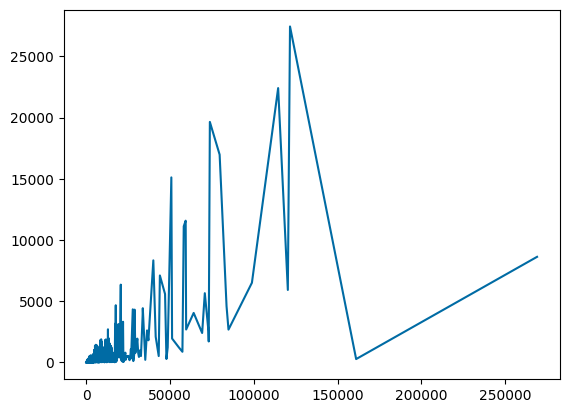

In [17]:
xpoints = dataSet["num_subscribers"]
ypoints = dataSet["num_reviews"]
plt.style.use("tableau-colorblind10")
plt.plot(xpoints,ypoints)
plt.show()

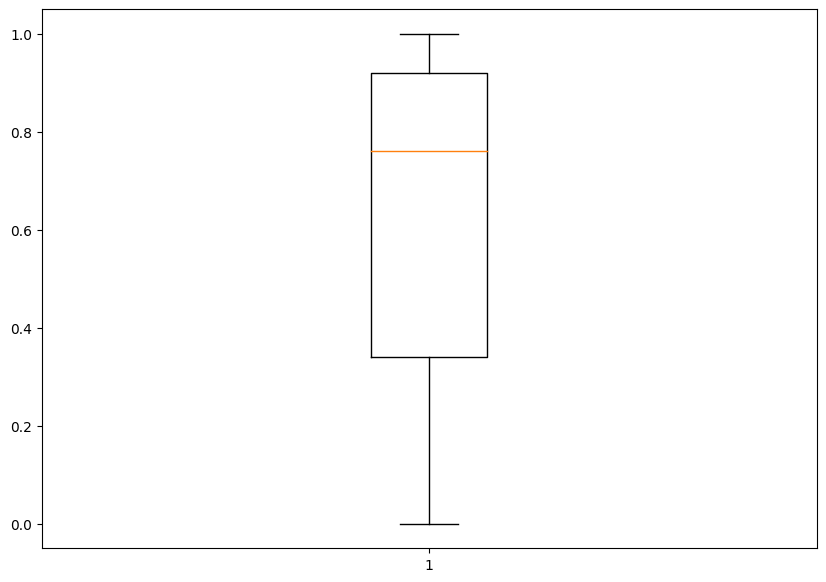

In [21]:
np.random.seed(10)
data = dataSet['Rating']
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

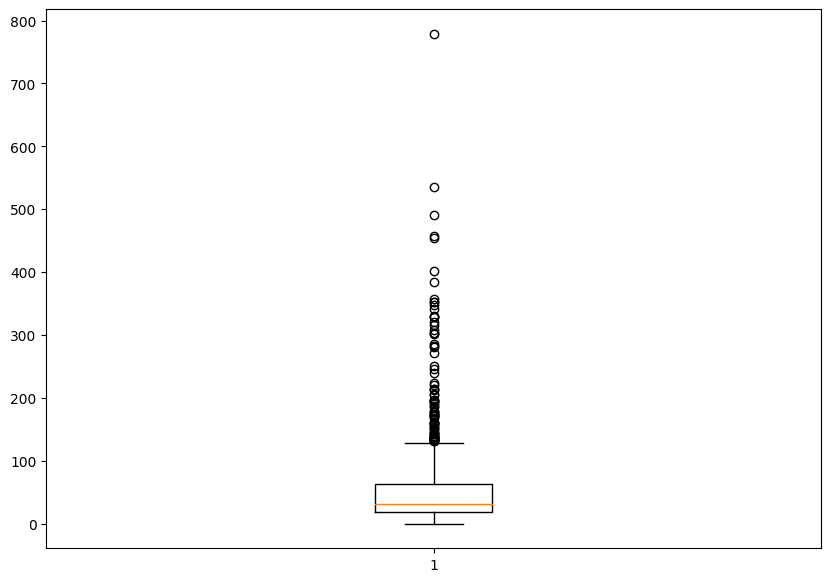

In [22]:
np.random.seed(10)
data = dataSet['num_lectures']
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
standardized = scaler.transform(X)
print(standardized)

[[-2.02053345 -1.16399907 18.02880683  5.26323943 -0.12312453  0.67940815]
 [-1.96669551 -1.16399907 10.61268638 -0.04966707 -0.41007526 -0.28762616]
 [-0.24636692  1.86045171  7.90142467 17.23541292  4.61156255  5.16921029]
 ...
 [ 1.64647764  0.72628267 -0.45334427 -0.22591558 -0.50572551 -0.56392167]
 [ 1.65486978  0.34822632 -0.45396289 -0.22464303  0.21165132  0.95570367]
 [ 1.71347502  1.86045171 -0.4543753  -0.22591558 -0.31442502 -0.21855228]]


In [6]:
# Assuming you have your training and test data in X_train, y_train, X_test, and y_test

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
print(X_train,X_test,Y_train,Y_test)

(963, 6) (241, 6) (963,) (241,)
      course_id  price  num_subscribers  num_reviews  num_lectures  \
901    362360.0   95.0           1134.0          9.0          24.0   
1153   966794.0   25.0            289.0         30.0          30.0   
432    553582.0   20.0           4193.0         92.0          44.0   
544    348920.0   95.0           2814.0         14.0          39.0   
265    159760.0   95.0           7517.0         89.0          47.0   
...         ...    ...              ...          ...           ...   
467    529028.0   50.0           3770.0        108.0          72.0   
299   1191946.0    0.0           6909.0        401.0          14.0   
494    883000.0  150.0           3415.0        312.0         160.0   
528    494078.0  195.0           3015.0         30.0          19.0   
1193  1178762.0  200.0            103.0         11.0          72.0   

      content_duration  
901                1.5  
1153               4.0  
432                2.5  
544                2.0  
26

# RANDOM FOREST REGRESSOR

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Initialize and train the Random Forest Regressor

regressor = RandomForestRegressor(n_estimators=100)
X_train = X_train[['num_lectures','num_reviews','num_subscribers','price']]
regressor.fit(X_train,Y_train)
X_test = X_test[['num_lectures','num_reviews','num_subscribers','price']]

# Make predictions on the test data

Y_predict = regressor.predict(X_test)
print(Y_predict)

[0.6278  0.8028  0.3923  0.9253  0.6496  0.8775  0.8334  0.7187  0.4735
 0.5647  0.5681  0.585   0.7803  0.9251  0.7346  0.4549  0.4778  0.7169
 0.5785  0.6032  0.9579  0.8035  0.7337  0.5142  0.546   0.4063  0.7606
 0.5795  0.708   0.4049  0.9446  0.6572  0.654   0.6667  0.9406  0.5715
 0.8289  0.7251  0.4745  0.7412  0.6249  0.5972  0.6226  0.7311  0.6646
 0.7092  0.6099  0.4344  0.7454  0.8408  0.5138  0.7081  0.6487  0.9111
 0.556   0.4595  0.7794  0.57862 0.4915  0.5513  0.6729  0.5072  0.6669
 0.5463  0.4029  0.426   0.6245  0.6201  0.8935  0.8852  0.8449  0.6142
 0.7862  0.6341  0.8672  0.7755  0.732   0.7305  0.8698  0.7816  0.4524
 0.5627  0.735   0.5686  0.4439  0.8385  0.5304  0.6891  0.9668  0.4176
 0.5393  0.6822  0.6421  0.7373  0.5508  0.5333  0.4391  0.3458  0.6299
 0.453   0.5577  0.4534  0.8732  0.5056  0.4054  0.503   0.5573  0.6877
 0.5448  0.3514  0.9646  0.4344  0.3615  0.6841  0.54466 0.8641  0.6475
 0.3101  0.4876  0.4845  0.53975 0.9621  0.7197  0.6051  0.51966

In [26]:
print('Train Score : ', regressor.score(X_train, Y_train)*100)

Train Score:  87.90434302391067


# ACCURACY FOR RANDOM FOREST REGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(Y_test, Y_predict)

print("R-squared:", r_squared)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_predict)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_predict)
print(mae,mse)

0.21021576763485486 0.06738740738672201
